In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_json("results/data-2019-09-02.json.gz")

In [4]:
df['db_env'] = df['db'] + '-' + df['env']
df.sample(n=10, random_state=42)

,action,db,duration,env,i,ms,qps,db_env
223286,create,postgres,9772002173,docker,16506.0,4952.295230,3333,postgres-docker
114926,update,postgres,1569629166,do,3165.0,3165.000000,1000,postgres-do
228070,read,postgres,5667993062,docker,4624.0,1387.338734,3333,postgres-docker
20491,create,mysql,17550671,do,387.0,1162.162162,333,mysql-do
9163,read2b,mysql,2192282,do,81.0,810.000000,100,mysql-do
47312,update,mysql,182132110,docker,552.0,1657.657658,333,mysql-docker
3442,read2a,postgres,2821985,do,22.0,666.666667,33,postgres-do
183063,update,postgres,231246984,docker,1288.0,1288.000000,1000,postgres-docker
287061,create2,postgres,26853286593,docker,13617.0,4085.508551,3333,postgres-docker
120821,delete,postgres,1239612,do,4059.0,4059.000000,1000,postgres-do


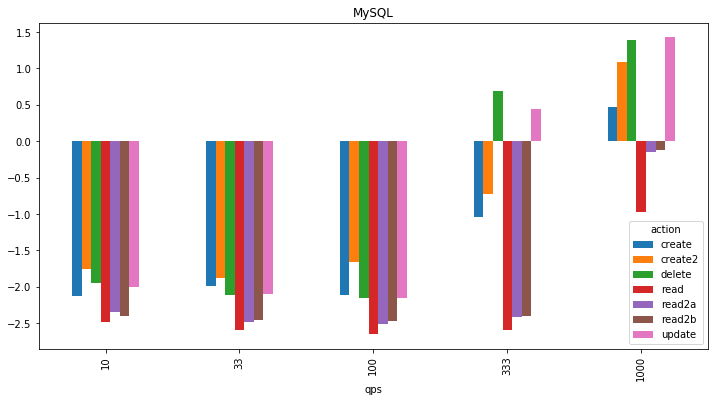

In [5]:
conditions = (
    ~df['action'].str.contains('Map')
        & (df['ms'] >= 1000)
        & (df['ms'] <= 4000)
        & (df['db_env'] == 'mysql-do')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='MySQL')

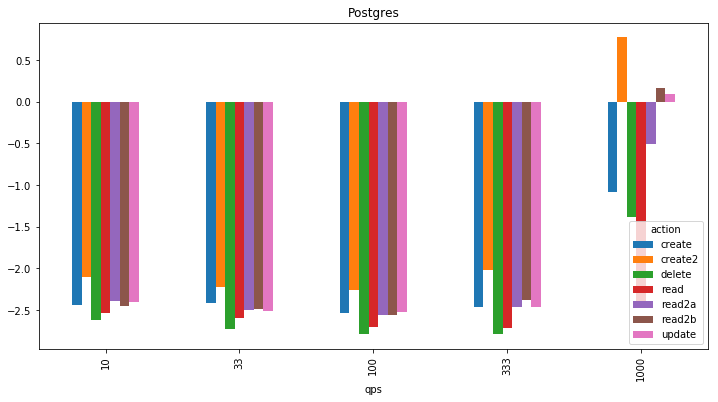

In [6]:
conditions = (
    ~df['action'].str.contains('Map')
        & (df['ms'] >= 1000)
        & (df['ms'] <= 4000)
        & (df['db_env'] == 'postgres-do')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='Postgres')

# Postgres still faster than MySQL

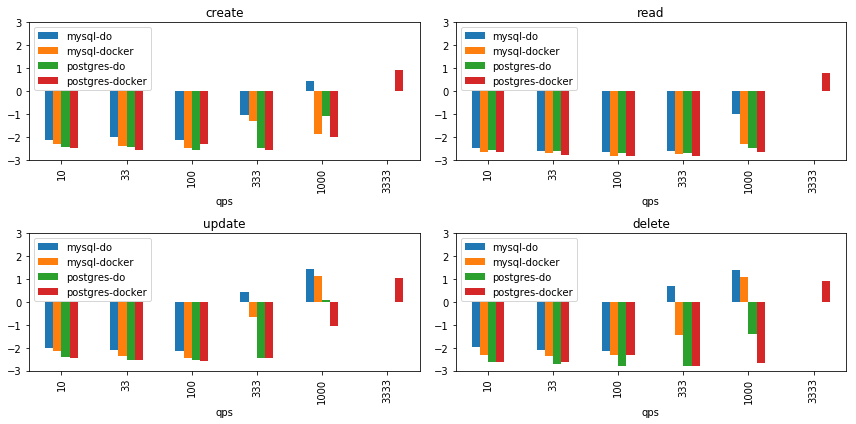

In [7]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['create', 'read', 'update', 'delete'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db_env', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    ax.set_ylim(-3, 3)
    
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='best')
    
plt.tight_layout()

# Complex queries and creates are significantly slower

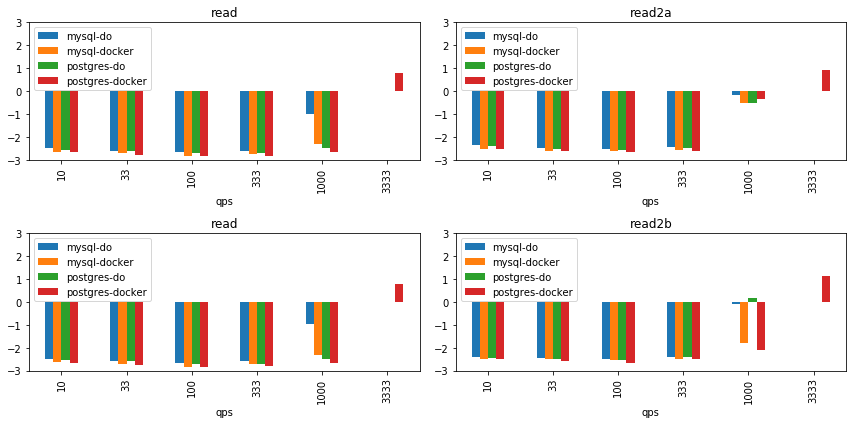

In [8]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['read', 'read2a', 'read', 'read2b'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db_env', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    ax.set_ylim(-3, 3)
    
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='best')
    
plt.tight_layout()

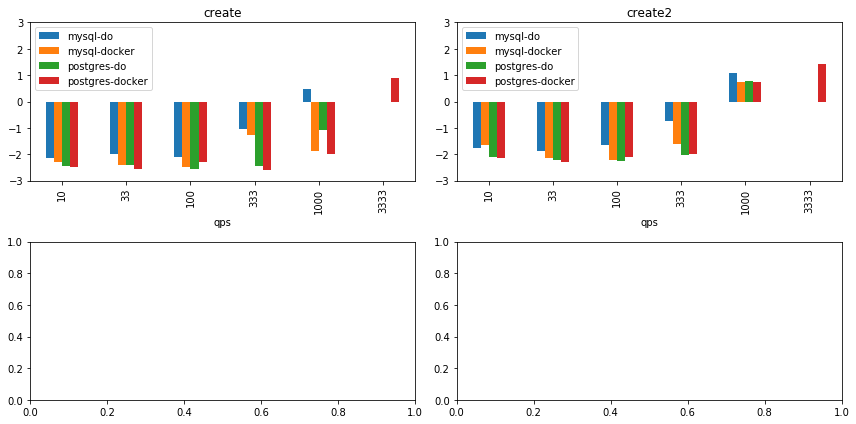

In [9]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['create', 'create2'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db_env', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    ax.set_ylim(-3, 3)
    
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='best')
    
plt.tight_layout()